### A Practice Tutorial for Beginners of python and Machine Learniong

In [105]:
#help(sys)

In [107]:
# Check the versions of libraries

# Python version
import sys
print('Python: {}'.format(sys.version))
# scipy
import scipy
print('scipy: {}'.format(scipy.__version__))
# numpy
import numpy
print('numpy: {}'.format(numpy.__version__))
# matplotlib
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))
# pandas
import pandas
print('pandas: {}'.format(pandas.__version__))
# scikit-learn
import sklearn
print('sklearn: {}'.format(sklearn.__version__))

Python: 3.7.0 (default, Jun 28 2018, 08:04:48) [MSC v.1912 64 bit (AMD64)]
scipy: 1.1.0
numpy: 1.15.1
matplotlib: 2.2.3
pandas: 0.23.4
sklearn: 0.19.2


In [2]:
print('sklearn: {}'.format(sklearn.__version__))

sklearn: 0.19.2


In [108]:
# Load libraries

import pandas
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [4]:
# Load dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
names = ['sepal-length','sepal-width','petal-length','petal-width','class']
dataset = pandas.read_csv(url,names=names)


In [5]:
#shape
print(dataset.shape)

(150, 5)


In [6]:
#head
print(dataset.head(150))

     sepal-length  sepal-width  petal-length  petal-width           class
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
5             5.4          3.9           1.7          0.4     Iris-setosa
6             4.6          3.4           1.4          0.3     Iris-setosa
7             5.0          3.4           1.5          0.2     Iris-setosa
8             4.4          2.9           1.4          0.2     Iris-setosa
9             4.9          3.1           1.5          0.1     Iris-setosa
10            5.4          3.7           1.5          0.2     Iris-setosa
11            4.8          3.4           1.6          0.2     Iris-setosa
12            4.8          3.0        

In [7]:
# Describe 
print(dataset.describe())

       sepal-length  sepal-width  petal-length  petal-width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [8]:
# Class Distribution
print(dataset.groupby('class').size())

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


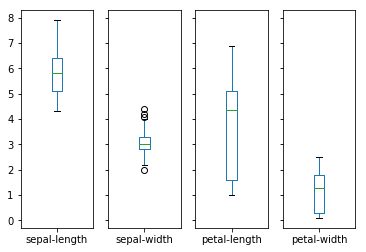

In [9]:
# box and whisker plots
dataset.plot(kind='box', subplots=True, layout=(1,4), sharex=False, sharey=True)
plt.show()

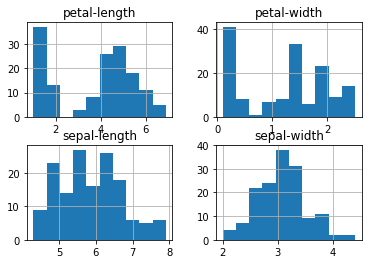

In [10]:
#histograms
dataset.hist()
plt.show()

# how to zoom in the histograms or changes ?


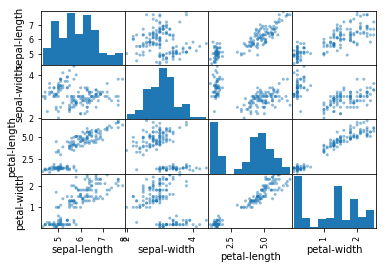

In [11]:
# Scattar Plot matrix
scatter_matrix(dataset)
plt.show()

In [13]:
#split out validation dataset
array = dataset.values
X = array[:,0:4]
print(X)
Y = array[:,4]
print(Y)
validation_size = 0.20
seed = 7
X_train,X_validation,Y_train, Y_validation = model_selection.train_test_split(X,Y,test_size = validation_size,random_state=seed)

[[5.1 3.5 1.4 0.2]
 [4.9 3.0 1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.0 3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.0 3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.0 1.4 0.1]
 [4.3 3.0 1.1 0.1]
 [5.8 4.0 1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.0 0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.0 3.0 1.6 0.2]
 [5.0 3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.0 3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.1 1.5 0.1]
 [4.4 3.0 1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.0 3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.0 3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.0 1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.0 3.3 1.4 0.2]
 [7.0 3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [14]:
print(X_train.shape)

(120, 4)


In [15]:
print(X_validation.shape)

(30, 4)


In [16]:
print(Y_validation.shape)

(30,)


In [17]:
print(Y_train.shape)

(120,)


In [18]:
# Test options and evaluation metric
seed = 7
scoring = 'accuracy'

In [65]:
# Spot Check all Algorithms

In [49]:
kfold = model_selection.KFold(n_splits=10,random_state=seed)
results = model_selection.cross_val_score(LogisticRegression(),X_train,Y_train,cv=kfold,scoring=scoring)
print(results)
print('Mean of Results',results.mean())

[1.         1.         0.91666667 1.         1.         1.
 0.91666667 0.91666667 0.91666667 1.        ]
Mean of Results 0.9666666666666666


In [48]:
kfold = model_selection.KFold(n_splits=10,random_state=seed)
results = model_selection.cross_val_score(LinearDiscriminantAnalysis(),X_train,Y_train,cv=kfold,scoring=scoring)
print(results)
print('Mean of Results',results.mean())

[1.         1.         1.         0.91666667 1.         1.
 0.91666667 1.         0.91666667 1.        ]
Mean of Results 0.975


In [50]:
kfold = model_selection.KFold(n_splits=10,random_state=seed)
results = model_selection.cross_val_score(KNeighborsClassifier(),X_train,Y_train,cv=kfold,scoring=scoring)
print(results)
print('Mean of Results',results.mean())

[1.         1.         1.         1.         1.         1.
 0.91666667 1.         1.         0.91666667]
Mean of Results 0.9833333333333332


In [64]:
kfold = model_selection.KFold(n_splits=10,random_state=seed,shuffle=False)
print(kfold)
results = model_selection.cross_val_score(DecisionTreeClassifier(),X_train,Y_train,cv=kfold,scoring=scoring)
print(results)
print('Mean of Results',results.mean())

KFold(n_splits=10, random_state=7, shuffle=False)
[1.         1.         1.         0.91666667 1.         1.
 0.91666667 1.         0.91666667 1.        ]
Mean of Results 0.975


In [67]:
# We can check in just one code   
models=[]
results=[]
names =[]
models.append(('LR', LogisticRegression()))
models.append(('LDA',LinearDiscriminantAnalysis()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('CART',DecisionTreeClassifier()))
models.append(('NB',GaussianNB()))
models.append(('SVM',SVC()))
for name, model in models:
    kfold = model_selection.KFold(n_splits=10,random_state=seed, shuffle=True)
    cv_results = model_selection.cross_val_score(model,X_train,Y_train,cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    

LR: 0.958333 (0.055902)
LDA: 0.975000 (0.038188)
KNN: 0.983333 (0.033333)
CART: 0.950000 (0.076376)
NB: 0.966667 (0.040825)
SVM: 0.991667 (0.025000)


In [73]:
print(results)

[array([0.91666667, 1.        , 1.        , 1.        , 1.        ,
       1.        , 0.83333333, 0.91666667, 1.        , 0.91666667]), array([1.        , 1.        , 1.        , 1.        , 1.        ,
       0.91666667, 0.91666667, 1.        , 0.91666667, 1.        ]), array([0.91666667, 1.        , 1.        , 1.        , 1.        ,
       1.        , 0.91666667, 1.        , 1.        , 1.        ]), array([1.        , 1.        , 0.75      , 1.        , 1.        ,
       0.91666667, 0.91666667, 1.        , 0.91666667, 1.        ]), array([1.        , 1.        , 1.        , 1.        , 1.        ,
       0.91666667, 0.91666667, 0.91666667, 0.91666667, 1.        ]), array([1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 0.91666667, 1.        , 1.        , 1.        ])]


AttributeError: 'AxesSubplot' object has no attribute 'set_xlabels'

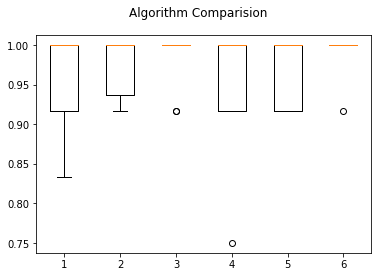

In [85]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparision')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xlabels(names)
plt.show()



In [87]:
# Make predictions on validation dataset using KNN
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
predictions = knn.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9
[[ 7  0  0]
 [ 0 11  1]
 [ 0  2  9]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.85      0.92      0.88        12
 Iris-virginica       0.90      0.82      0.86        11

    avg / total       0.90      0.90      0.90        30



In [88]:
# Make predictions on validation dataset using Logistic Regression
LR = LogisticRegression()
LR.fit(X_train, Y_train)
predictions = LR.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.8
[[ 7  0  0]
 [ 0  7  5]
 [ 0  1 10]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.88      0.58      0.70        12
 Iris-virginica       0.67      0.91      0.77        11

    avg / total       0.83      0.80      0.80        30



In [90]:
# Make predictions on validation dataset using LinearDiscriminantAnalysis
LDA = LinearDiscriminantAnalysis()
LDA.fit(X_train, Y_train)
predictions = LDA.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9666666666666667
[[ 7  0  0]
 [ 0 11  1]
 [ 0  0 11]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       1.00      0.92      0.96        12
 Iris-virginica       0.92      1.00      0.96        11

    avg / total       0.97      0.97      0.97        30



In [91]:
# Make predictions on validation dataset using DecisionTreeClassifier
CART = DecisionTreeClassifier()
CART.fit(X_train, Y_train)
predictions = CART.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.8666666666666667
[[ 7  0  0]
 [ 0 11  1]
 [ 0  3  8]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.79      0.92      0.85        12
 Iris-virginica       0.89      0.73      0.80        11

    avg / total       0.87      0.87      0.87        30



In [92]:
# Make predictions on validation dataset using GaussianNB()
NB = GaussianNB()
NB.fit(X_train, Y_train)
predictions = NB.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.8333333333333334
[[7 0 0]
 [0 9 3]
 [0 2 9]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.82      0.75      0.78        12
 Iris-virginica       0.75      0.82      0.78        11

    avg / total       0.84      0.83      0.83        30



In [93]:
# Make predictions on validation dataset using SVM
SVM = SVC()
SVM.fit(X_train, Y_train)
predictions = SVM.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9333333333333333
[[ 7  0  0]
 [ 0 10  2]
 [ 0  0 11]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       1.00      0.83      0.91        12
 Iris-virginica       0.85      1.00      0.92        11

    avg / total       0.94      0.93      0.93        30

